In [1]:
import sys
sys.path.append("../..")

import pandas

from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn
from pandas import DataFrame

# Import dictonaries and Types
from app.components.basic_dataframes import dictMealState, dfMealCode, dfMealState
from app.components.simple_types import Nutrition, State
from app.components.extract_data.extract_data import getDictPersonIdStrata

# Use simple function
from app.components.search.papa_search import papaSingleSeach, SearchResult

Loading basic data
Loading basic dictionary
Finish!


In [2]:
from app.components.extract_data.extract_data import getDfConsumo, getDictNutritionByMeal

dfConsumo = getDfConsumo()
dictNutritionByMeal = getDictNutritionByMeal()

(DataFrame(dictNutritionByMeal).T).nlargest(10, "PTN")

,ENERGIA_KCAL,CHOTOT,PTN,LIP,FIBRA,COLEST,CALCIO,AGTRANS,AGSAT,AGPOLI,...,RIBOFLAVINA,PIRIDOXAMINA,NIACINA,COBALAMINA,VITC,VITA_RAE,COBRE,FOLATO,FOSFORO,ZINCO
C0097N,3.57,0.0322,0.7813,0.0156,0.0310,0.1600,4.6900,0.0000,0.0078,0.0030,...,0.0202,0.0061,0.0114,0.0245,0.0000,0.0000,0.0005,0.3300,13.2100,0.0618
C0041T,3.08,0.3925,0.4583,0.0101,0.2060,0.0000,1.9966,0.0000,0.0011,0.0044,...,0.0004,0.0003,0.0000,0.0000,0.0000,0.0166,0.0125,3.0036,5.2260,0.0440
C0861F,1.88,0.0141,0.3604,0.0488,0.0000,1.0951,0.0708,0.0000,0.0161,0.0081,...,0.0032,0.0035,0.1175,0.0050,0.0000,0.0000,0.0000,0.0398,2.3593,0.0379
C0632F,2.08,0.0000,0.3574,0.0728,0.0000,1.2511,0.0488,0.0012,0.0309,0.0030,...,0.0003,0.0000,0.0300,0.0219,0.0000,0.0000,0.0012,0.1889,2.8754,0.0806
C0617F,1.83,0.0000,0.3572,0.0447,0.0000,1.0144,0.0508,0.0004,0.0202,0.0010,...,0.0017,0.0016,0.0491,0.0229,0.0000,0.0000,0.0009,0.0371,2.3952,0.0511
C0048T,4.78,0.2848,0.3569,0.2618,0.0731,0.0000,3.5904,0.0000,0.0330,0.1290,...,0.0011,0.0000,0.0000,0.0000,0.0921,0.0000,0.0119,2.8798,6.4655,0.0584
C0697F,2.00,0.0000,0.3556,0.0637,0.0000,1.0261,0.1953,0.0002,0.0259,0.0070,...,0.0007,0.0011,0.1238,0.0055,0.0000,0.0000,0.0003,0.0111,2.3729,0.0175
C0713B,2.29,0.3910,0.3480,0.0070,0.3640,0.3000,0.8600,0.0000,0.0010,0.0026,...,0.0207,0.0038,0.0540,0.3990,0.0300,23.0000,0.0039,15.0000,5.3000,0.0230
C0130E,1.49,0.0000,0.3455,0.0117,0.0000,0.6430,0.0992,0.0000,0.0067,0.0000,...,0.0005,0.0000,0.0719,0.0964,0.0000,0.2458,0.0011,0.1177,3.0736,0.0054
C0038G,3.55,0.5210,0.3436,0.0106,0.0000,0.2818,13.6411,0.0002,0.0068,0.0000,...,0.0120,0.0000,0.0081,0.0323,0.0855,3.4064,0.0016,0.3679,16.7458,0.0385


In [3]:
dfConsumo.columns

Index(['UF', 'ESTRATO_POF', 'TIPO_SITUACAO_REG', 'COD_UPA', 'NUM_DOM',
       'NUM_UC', 'COD_INFORMANTE', 'QUADRO', 'SEQ', 'V9005', 'V9007', 'V9001',
       'V9015', 'V9016', 'V9017', 'V9018', 'V9019', 'V9020', 'V9021', 'V9022',
       'V9023', 'V9024', 'V9025', 'V9026', 'V9027', 'V9028', 'V9029', 'V9030',
       'COD_UNIDADE_MEDIDA_FINAL', 'COD_PREPARACAO_FINAL', 'GRAMATURA1', 'QTD',
       'COD_TBCA', 'ENERGIA_KCAL', 'ENERGIA_KJ', 'PTN', 'CHOTOT', 'FIBRA',
       'LIP', 'COLEST', 'AGSAT', 'AGMONO', 'AGPOLI', 'AGTRANS', 'CALCIO',
       'FERRO', 'SODIO', 'MAGNESIO', 'FOSFORO', 'POTASSIO', 'COBRE', 'ZINCO',
       'VITA_RAE', 'TIAMINA', 'RIBOFLAVINA', 'NIACINA', 'PIRIDOXAMINA',
       'COBALAMINA', 'VITD', 'VITE', 'VITC', 'FOLATO', 'PESO', 'PESO_FINAL',
       'RENDA_TOTAL', 'DIA_SEMANA', 'DIA_ATIPICO', 'id', 'iddomic', 'PESSOA'],
      dtype='object')

In [4]:
dfConsumo[dfConsumo["V9001"] == 8000101.0][["V9001", "COD_PREPARACAO_FINAL", "ENERGIA_KCAL", "QTD"]]

,V9001,COD_PREPARACAO_FINAL,ENERGIA_KCAL,QTD
0,8000101.0,99.0,210.0,70.0
26,8000101.0,99.0,210.0,70.0
54,8000101.0,99.0,210.0,70.0
294,8000101.0,99.0,630.0,210.0
318,8000101.0,99.0,210.0,70.0
...,...,...,...,...
1174694,8000101.0,99.0,210.0,70.0
1174702,8000101.0,99.0,210.0,70.0
1174735,8000101.0,99.0,210.0,70.0
1174928,8000101.0,99.0,210.0,70.0


In [16]:
# Get all personID
people = list(dictMealState)
personID = people[1]
personID = people[2]
# personID = 'UNKNOW'
print("people:", people)
print("personID:", personID)

people: ['110000016.0#2.0#1.0#1.0', '110000016.0#2.0#1.0#2.0', '110000016.0#2.0#1.0#3.0', '110000016.0#7.0#1.0#1.0', '110000016.0#7.0#1.0#2.0', '110000016.0#7.0#1.0#4.0', '110000016.0#7.0#1.0#5.0', '110000016.0#12.0#1.0#2.0', '110000016.0#12.0#1.0#3.0', '110000016.0#13.0#1.0#1.0', '110000584.0#2.0#1.0#2.0', '110000584.0#8.0#1.0#1.0', '110000584.0#8.0#1.0#2.0', '110000584.0#10.0#1.0#1.0', '110000584.0#11.0#1.0#2.0', '110000602.0#2.0#1.0#1.0', '110000602.0#5.0#1.0#1.0', '110000602.0#5.0#1.0#2.0', '110000602.0#8.0#1.0#1.0', '110000602.0#8.0#1.0#2.0', '110000602.0#9.0#1.0#1.0', '110000602.0#9.0#1.0#2.0', '110000602.0#9.0#1.0#3.0', '110000602.0#9.0#1.0#4.0', '110000620.0#2.0#1.0#1.0', '110000620.0#13.0#1.0#1.0', '110000620.0#13.0#1.0#2.0', '110000620.0#13.0#1.0#3.0', '110001098.0#3.0#1.0#1.0', '110001098.0#8.0#1.0#1.0', '110001098.0#8.0#1.0#2.0', '110001098.0#8.0#1.0#4.0', '110001098.0#12.0#1.0#1.0', '110001098.0#12.0#1.0#2.0', '110001098.0#12.0#1.0#3.0', '110001197.0#4.0#1.0#1.0', '1100011

In [17]:
# fitness = Nutrition.absDifference
fitness = Nutrition.absDifferenceNegativePenalty
# fitness = Nutrition.distanceDifference
# result = papaSingleSeach(personID, max_population_set=10, max_population_selected=5, max_steps=1000)
# result = papaSingleSeach(personID, verbose=True, max_population_set=10,max_population_selected=5, unit=50, max_unit=5, max_steps=25)
result = papaSingleSeach(personID, verbose=True, unit=50, max_unit=2, max_population_set=500, max_population_selected=300, expansion_set=50, expansion_select=20, max_steps=100, fitness=fitness)
# result = papaSingleSeach(personID, verbose=True, unit=100, max_unit=2, max_population_set=10, max_population_selected=10, expansion_set=10, expansion_select=3, max_steps=25, fitness=fitness)
# result = papaSingleSeach(personID, verbose=True, max_population_set=10,max_population_selected=8, expansion_set=5, unit=5, max_unit=10, max_steps=25, fitness=Nutrition.distanceDifference)

print(result)
targetNutrition = Nutrition.idealNutritionByPersonId(personID)
print("       PersonID: ", result.personIDs)
print("initialDistance: ", fitness(result.initialNutrition, targetNutrition))
print("  finalDistance: ", fitness(result.finalNutrition, targetNutrition))

Step 100: 
Best fitness:  1505310.0784999996
initialState:  State: {'C0002A': 70.0, 'C0008D': 14.0, 'C0081H': 150.0, 'C0007K': 15.0, 'C0209A': 270.0, 'C0638F': 210.0, 'C0091T': 350.0, 'C0008U': 0.0, 'C0145H': 0.0, 'C0418A': 0.0, 'C0634F': 0.0, 'C0377B': 0.0, 'C0030H': 0.0, 'C0225A': 0.0, 'C0031D': 0.0, 'C0030L': 0.0, 'C0055A': 0.0, 'C0002D': 0.0, 'C0043A': 0.0, 'C0038C': 0.0, 'C0906B': 0.0, 'C0716F': 0.0, 'C0134C': 0.0, 'C0902B': 0.0, 'C0023C': 0.0, 'C0060K': 0.0, 'C0170A': 0.0, 'C0046K': 0.0, 'C0576F': 0.0, 'C0009H': 0.0, 'C0062H': 0.0, 'C0734F': 0.0, 'C0558B': 0.0, 'C0161C': 0.0, 'C0230F': 0.0, 'C0150B': 0.0, 'C0006C': 0.0, 'C0211A': 0.0, 'C0713F': 0.0, 'C0023J': 0.0, 'C0118B': 0.0, 'C0732F': 0.0, 'C0002C': 0.0, 'C0708F': 0.0, 'C0788B': 0.0, 'C0782B': 0.0, 'C0533F': 0.0, 'C0087B': 0.0, 'C0147C': 0.0, 'C0460A': 0.0, 'C0062K': 0.0, 'C0245F': 0.0, 'C0419A': 0.0, 'C0834A': 0.0, 'C0898F': 0.0, 'C0733F': 0.0, 'C0028J': 0.0, 'C0165A': 0.0, 'C0859F': 0.0, 'C0212A': 0.0, 'C0031H': 0.0, 'C0109

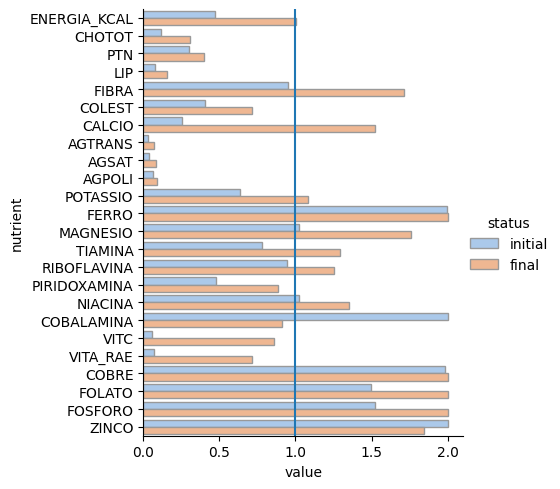

In [18]:
result.show_comparison_graph("", title="")


In [19]:
df = result.save_as_xls("./output/test_result")
df

,Nutrient,Initial Value,Final Value,Target Value
0,ENERGIA_KCAL,1404.55,2999.55,2989.8700
1,CHOTOT,194.79,510.09,1644.4285
2,PTN,90.52,118.44,298.9870
3,LIP,35.89,69.32,448.4805
4,FIBRA,29.47,53.10,31.0000
5,COLEST,122.22,214.06,300.0000
6,CALCIO,219.60,1322.27,868.0000
7,AGTRANS,0.90,2.16,29.8987
8,AGSAT,11.01,25.14,298.9870
9,AGPOLI,11.47,16.50,179.3922


In [20]:
from app.components.scripts.get_tbca import TBCA

dictTBCAName = TBCA.getDictTBCA()

In [21]:
print(dictTBCAName["C0638F"])
print(dictTBCAName["C0118B"])
print(dictTBCAName["C0087B"])
print(dictTBCAName["C0834A"])
print(dictTBCAName["C0160A"])
print(dictTBCAName["C0569B"])
print(dictTBCAName["C0048G"])
print(dictTBCAName["C0182C"])
print(dictTBCAName["C0499F"])
# C0638F - Init: 210.0  / Final: 60.0
# C0118B - Init: 0.0  / Final: 50.0
# C0087B - Init: 0.0  / Final: 150.0
# C0834A - Init: 0.0  / Final: 50.0
# C0160A - Init: 0.0  / Final: 50.0
# C0048G - Init: 0.0  / Final: 100.0
# C0182C - Init: 0.0  / Final: 350.0
# C0499F - Init: 0.0  / Final: 350.0
# C0012A - Init: 0.0  / Final: 250.0

tbca code: C0638F
portuguese: Carne, bovina, patinho, s/ gordura, refogada (c/ óleo, cebola e alho), c/ sal,Bos taurus
english: Meat, beef, knuckle, without fat, braised (with oil, onion and garlic), with salt
nutrients: {'ENERGIA_KCAL': 1.64, 'CHOTOT': 0.0074, 'PTN': 0.278, 'LIP': 0.0558, 'FIBRA': 0.0014000000000000002, 'COLEST': 0.54, 'AGSAT': 0.0213, 'AGPOLI': 0.0091, 'AGTRANS': 0.0008, 'CALCIO': 0.0547, 'FERRO': 0.0232, 'SODIO': 2.43, 'MAGNESIO': 0.287, 'FOSFORO': 2.23, 'POTASSIO': 4.24, 'ZINCO': 0.056799999999999996, 'COBRE': 0.0008, 'VITA_RAE': 0.0132, 'TIAMINA': 0.0011, 'RIBOFLAVINA': 0.0011, 'NIACINA': 0.04190000000000001, 'PIRIDOXAMINA': 0.0001, 'COBALAMINA': 0.0181, 'VITC': 0.0045000000000000005, 'FOLATO': 0.163}
tbca code: C0118B
portuguese: Batata, inglesa, frita (c/ óleo de soja), c/ sal,Solanum tuberosumL. 
english: Potato, french fries, fried (with soy oil), with salt
nutrients: {'ENERGIA_KCAL': 2.48, 'CHOTOT': 0.327, 'PTN': 0.0404, 'LIP': 0.11900000000000001, 'FIBRA': 0

### Problemas

1 - Quando uma pessoa passa nbo sódio, ela passa muito no sódio, ai o algoritmo tenta primeiro regular o sódio antes de ir os outros nutrientes. (personID = people[2])

2 - Quando a pessoa está com defict em energia, ela prioriza muito o açucar inicialmente, o que impede da função melhorar depois de um tempo. (personID = people[1])

